# Mall customers segmentation 

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Read the data
data_mall=pd.read_csv('Mall_Customers.csv')

In [3]:
#Display the first five rows
data_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Display the last five rows
data_mall.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#checking the shape of the dataframe
data_mall.shape

(200, 5)

# Data Exploratory

In [6]:
#check the summary statistics
data_mall.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [7]:
#checking for missing values
data_mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# data types in the dataset
data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<ipython-input-9-baa6706e0a22>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_mall['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

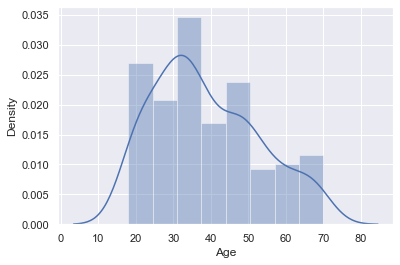

In [9]:
#Age distribution plot
sns.distplot(data_mall['Age'])

<ipython-input-10-cd83cc870990>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_mall['Annual Income (k$)'])


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

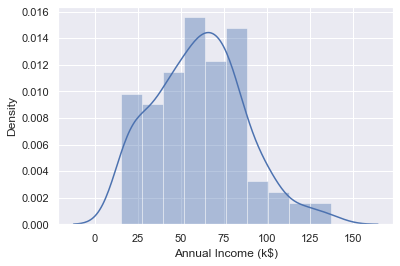

In [10]:
#Annual income distribution
sns.distplot(data_mall['Annual Income (k$)'])

<ipython-input-11-8cfba6b025f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_mall['Spending Score (1-100)'])


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

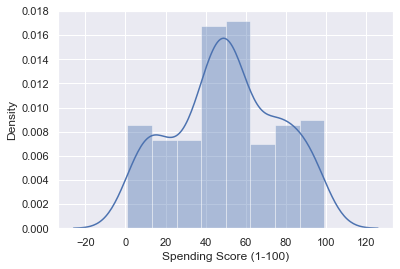

In [11]:
#Spending Score distribution plot
sns.distplot(data_mall['Spending Score (1-100)'])

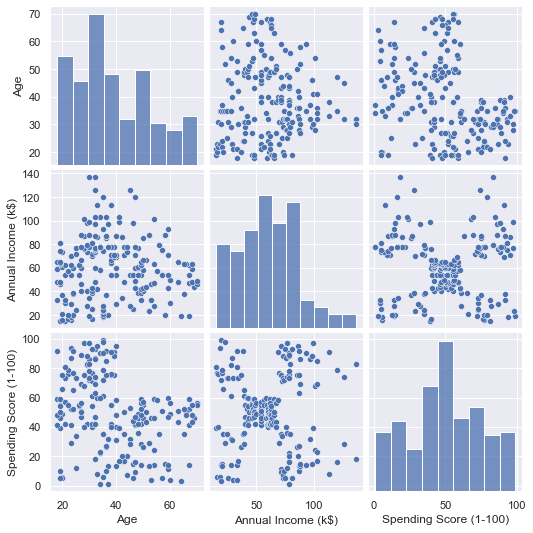

In [12]:
#pairplot
sns.pairplot(data_mall[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)' ]])

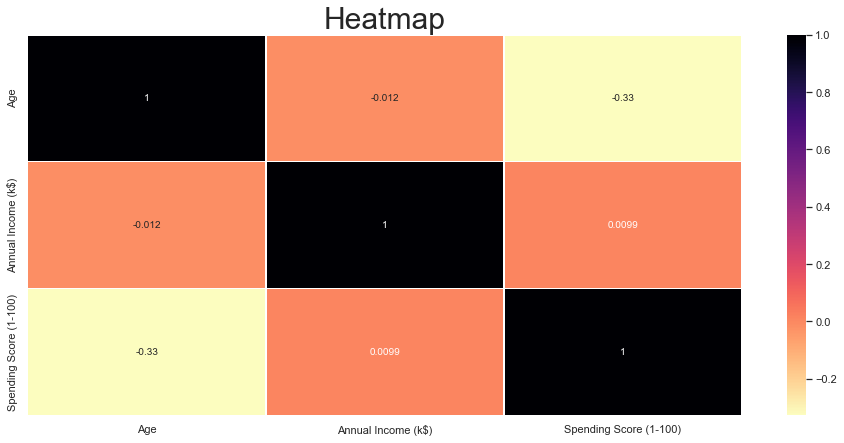

In [13]:
#heatmap
plt.rcParams['figure.figsize']=(16, 7)
sns.heatmap(data_mall[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)' ]].corr(), cmap ='magma_r', annot =True, linewidth=.5)
plt.title('Heatmap', fontsize=30)
plt.show()

Text(0, 0.5, 'Spending Score (1-100)')

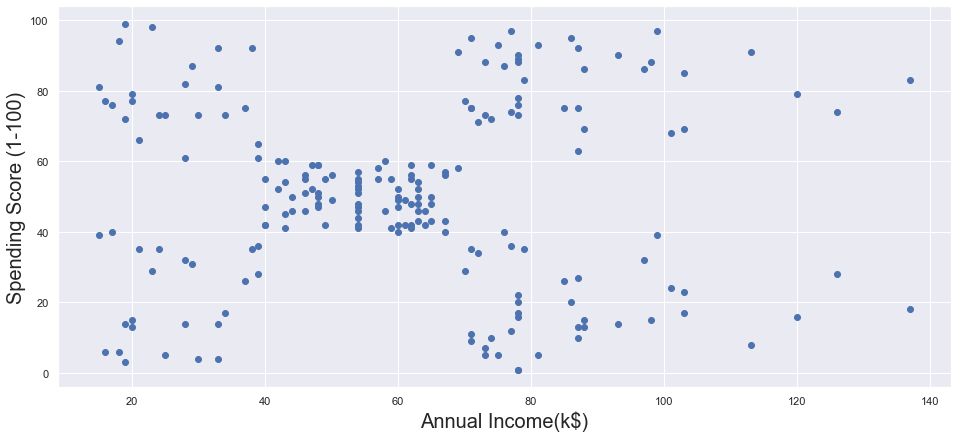

In [14]:
#scatterplot -Annual Income vs Spending Score
plt.scatter(data_mall['Annual Income (k$)'],data_mall['Spending Score (1-100)'])
plt.xlabel('Annual Income(k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)

# K-Means Clustering

In [15]:
#Based on Annual Income and Spending Score
##USING K-MEANS CLUSTERING
data_1=data_mall.drop('CustomerID',axis=1)
x=data_1.iloc[:,2:4].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
#The elbow method
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
number_of_clusters=range(1,10)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


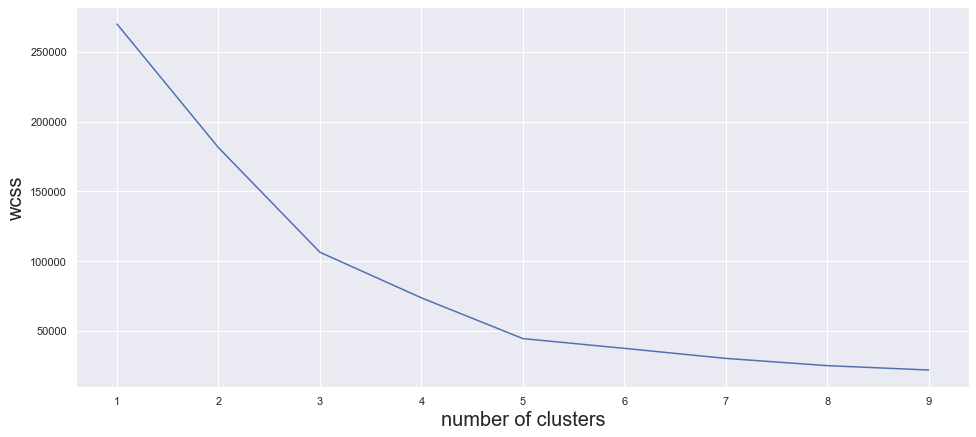

In [17]:
plt.plot(number_of_clusters,wcss)
plt.xlabel('number of clusters',fontsize=20)
plt.ylabel('wcss',fontsize=20)
plt.show()

In [18]:
kmeans=KMeans(n_clusters=5,n_init=10)
kmeans_new=kmeans.fit_predict(x)
#data_with_clusters=x.copy()
#data_with_clusters['clusters']=kmeans_new.fit_predict(x)
#data_with_clusters

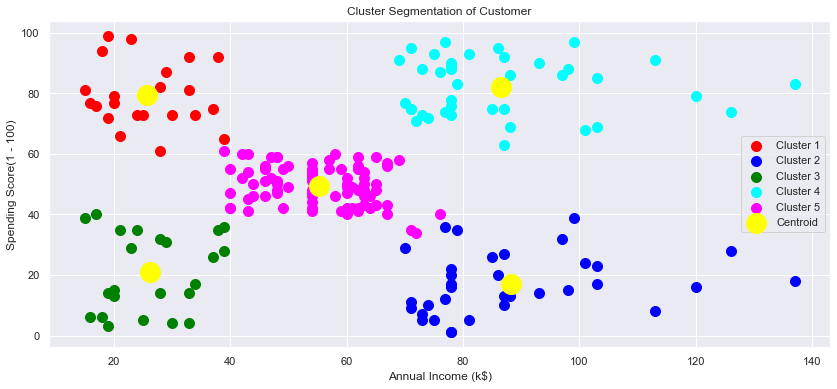

In [19]:
#plotting the clusters
fig,ax = plt.subplots(figsize=(14, 6))
ax.scatter(x[kmeans_new==0,0],x[kmeans_new==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(x[kmeans_new==1,0],x[kmeans_new==1,1],s=100, c='blue', label='Cluster 2')
ax.scatter(x[kmeans_new==2,0],x[kmeans_new==2,1],s=100, c='green', label='Cluster 3')
ax.scatter(x[kmeans_new==3,0],x[kmeans_new==3,1],s=100, c='cyan', label='Cluster 4')
ax.scatter(x[kmeans_new==4,0],x[kmeans_new==4,1],s=100, c='magenta', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1 - 100)')
plt.legend()
plt.show()